In [1]:
# Import all necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
os.chdir('/users/dennis/desktop/practice data')

In [3]:
df = pd.read_csv('uci-news-aggregator.csv')

In [4]:
# Since the dataset is too large, I only want to use the subset of the data, 10%. 

df.head(5)
df = df.sample(frac=0.1)



df.describe()

,ID,TIMESTAMP
count,42242.000000,4.224200e+04
mean,211446.017613,1.400441e+12
std,121750.897825,3.719663e+09
min,16.000000,1.394471e+12
25%,105542.750000,1.397348e+12
50%,212150.500000,1.400371e+12
75%,316557.750000,1.403715e+12
max,422932.000000,1.409229e+12


In [5]:
# Preprocessing
# Convert category alphabet to corresponding category name 

category_name = pd.DataFrame({'id':['b','t','e','m'], 'catname':['business','science and tech','entertainment', 'health']})

In [6]:
df = df[['TITLE', 'CATEGORY']]
df.head()

,TITLE,CATEGORY
316325,Exclusive: Remember the King of Pop with the u...,e
96211,Stock futures under water after inflation data...,b
402334,Allison Williams To Play Peter Pan,e
301623,"Stock Alert: Tyco International (NYSE:TYC), Re...",b
316080,Chromebook Pixel owners receive $150 Visa gift...,t


In [7]:
df = pd.merge(df, category_name, left_on = 'CATEGORY', right_on ='id')

df.head(5)

,TITLE,CATEGORY,id,catname
0,Exclusive: Remember the King of Pop with the u...,e,e,entertainment
1,Allison Williams To Play Peter Pan,e,e,entertainment
2,The Many Faces Of Russell Crowe,e,e,entertainment
3,Game of Thrones: how does the TV series compar...,e,e,entertainment
4,Report: Strahan could co-host Good Morning Ame...,e,e,entertainment


In [8]:
df.drop(['id','CATEGORY'], axis = 1, inplace=True)
df.head()

,TITLE,catname
0,Exclusive: Remember the King of Pop with the u...,entertainment
1,Allison Williams To Play Peter Pan,entertainment
2,The Many Faces Of Russell Crowe,entertainment
3,Game of Thrones: how does the TV series compar...,entertainment
4,Report: Strahan could co-host Good Morning Ame...,entertainment


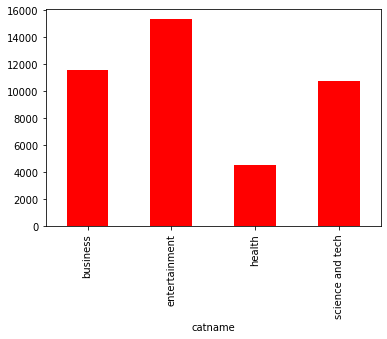

In [9]:
df.groupby('catname').TITLE.count().plot.bar(color='red')

In [10]:
# Removing empty data and unnecessary punctuation 
# 1. Import regular expression library
# 2. Create a function tht eliminates puctuation marks

import re
def remove_punc(sentence):
    sentence = sentence.lower()
    
    sentence = re.sub('[^a-z\\s ]+','', sentence)
    return(sentence)

In [11]:
type(remove_punc)

function

In [12]:
df['TITLE'] = df['TITLE'].apply(remove_punc)

In [13]:
df.head(15)

,TITLE,catname
0,exclusive remember the king of pop with the ul...,entertainment
1,allison williams to play peter pan,entertainment
2,the many faces of russell crowe,entertainment
3,game of thrones how does the tv series compare...,entertainment
4,report strahan could cohost good morning america,entertainment
5,pippa middleton claims she has been publicly b...,entertainment
6,xmen atop holiday opener bests with m,entertainment
7,cody simpson cody simpson voted off americas ...,entertainment
8,video fifa releases pitbull and jennifer lopez...,entertainment
9,nicki minaj throws shade at iggy azalea during...,entertainment


In [14]:
# Now remove stop words that are not needed in our news title
import nltk
from nltk.corpus import stopwords 


In [15]:
sw = stopwords.words('English')

#write a function to eliminate stopwordss:

def stop_word(sentence):
    new_sentence = []
    for word in sentence.split():
        if word not in sw:
            new_sentence.append(word)
    return(" ".join(new_sentence))

df['TITLE'] = df['TITLE'].apply(stop_word)
df.head(15)


,TITLE,catname
0,exclusive remember king pop ultimate michael j...,entertainment
1,allison williams play peter pan,entertainment
2,many faces russell crowe,entertainment
3,game thrones tv series compare books,entertainment
4,report strahan could cohost good morning america,entertainment
5,pippa middleton claims publicly bullied since ...,entertainment
6,xmen atop holiday opener bests,entertainment
7,cody simpson cody simpson voted americas danci...,entertainment
8,video fifa releases pitbull jennifer lopezs of...,entertainment
9,nicki minaj throws shade iggy azalea bet award...,entertainment


In [16]:
#Stemming the words using NLTK SnowballStemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
def stem(sentence):
    new_sentence = []
    for word in sentence.split():
        word = stemmer.stem(word)
        new_sentence.append(word)
    return(" ".join(new_sentence))


df['TITLE'] = df['TITLE'].apply(stem)
df.head(15)



,TITLE,catname
0,exclus rememb king pop ultim michael jackson danc,entertainment
1,allison william play peter pan,entertainment
2,mani face russel crow,entertainment
3,game throne tv seri compar book,entertainment
4,report strahan could cohost good morn america,entertainment
5,pippa middleton claim public bulli sinc royal wed,entertainment
6,xmen atop holiday open best,entertainment
7,codi simpson codi simpson vote america danc star,entertainment
8,video fifa releas pitbul jennif lopez offici w...,entertainment
9,nicki minaj throw shade iggi azalea bet award ...,entertainment


In [17]:
#Now let's try the alternative, "lemmatization". This will be better as it will try to understand the context too.

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize(sentence):
    new_sentence = []
    for word in sentence.split():
        word = lemmatizer.lemmatize(word)
        new_sentence.append(word)
    return(" ".join(new_sentence))

df['TITLE'] = df['TITLE'].apply(lemmatize)
df.head(15)

,TITLE,catname
0,exclus rememb king pop ultim michael jackson danc,entertainment
1,allison william play peter pan,entertainment
2,mani face russel crow,entertainment
3,game throne tv seri compar book,entertainment
4,report strahan could cohost good morn america,entertainment
5,pippa middleton claim public bulli sinc royal wed,entertainment
6,xmen atop holiday open best,entertainment
7,codi simpson codi simpson vote america danc star,entertainment
8,video fifa releas pitbul jennif lopez offici w...,entertainment
9,nicki minaj throw shade iggi azalea bet award ...,entertainment


In [18]:
# Now, we would like to calculate TD-IDF to see which words are important than others


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5, ngram_range=(1,2))
tfidf_features = tfidf.fit_transform(df.TITLE)


In [20]:
df.head()

,TITLE,catname
0,exclus rememb king pop ultim michael jackson danc,entertainment
1,allison william play peter pan,entertainment
2,mani face russel crow,entertainment
3,game throne tv seri compar book,entertainment
4,report strahan could cohost good morn america,entertainment


In [21]:
from sklearn.feature_selection import chi2
N = 5
Number = 1
for category in df['catname'].unique():
    features_chi2 = chi2(tfidf_features, df['catname'] == category)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [x for x in feature_names if len(x.split(' '))==1]
    bigrams = [x for x in feature_names if len(x.split(' '))==2]
    print("{}.{}:".format(Number,category))
    print("\t# Unigrams: \n\t.{}".format('\n\t.'.join(unigrams[-N:])))
    print("\t# Bigrams:\n\t.{}".format('\n\t.'.join(bigrams[-N:])))
    Number +=1



1.entertainment:
	# Unigrams: 
	.throne
	.movi
	.star
	.kim
	.kardashian
	# Bigrams:
	.justin bieber
	.kany west
	.miley cyrus
	.game throne
	.kim kardashian
2.business:
	# Unigrams: 
	.china
	.profit
	.rate
	.bank
	.stock
	# Bigrams:
	.bank america
	.unemploy rate
	.american apparel
	.interest rate
	.wall street
3.science and tech:
	# Unigrams: 
	.facebook
	.microsoft
	.samsung
	.appl
	.googl
	# Bigrams:
	.htc one
	.climat chang
	.xbox one
	.googl glass
	.samsung galaxi
4.health:
	# Unigrams: 
	.fda
	.mer
	.cancer
	.studi
	.ebola
	# Bigrams:
	.fda approv
	.breast cancer
	.west africa
	.west nile
	.ebola outbreak


In [22]:
# Now, let's feed features into machine learning algorithm
# 1. Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
dtclass = DecisionTreeClassifier(criterion = 'gini', splitter ='best', random_state= 77)
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['catname'], test_size = 1/5, random_state = 50)
dtclass.fit(X_train,y_train)
pred = dtclass.predict(X_test)

from sklearn.metrics import accuracy_score
print('accuracy score:')
print(accuracy_score(y_test, pred))

accuracy score:
0.8335897739377441


In [23]:
# 2. Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
rfclass = RandomForestClassifier(n_estimators = 50, criterion ='gini', random_state= 77)
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['catname'], test_size = 1/5, random_state = 50)
rfclass.fit(X_train, y_train)
pred = rfclass.predict(X_test)

print("Accuracy score:")
print(accuracy_score(y_test,pred))


Accuracy score:
0.8797490827316842


In [24]:
# 3. Support Vector Machine
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100)
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['catname'], test_size = 1/5, random_state = 50)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print("Accuracy score:")
print(accuracy_score(y_test, pred))


Accuracy score:
0.8958456622085453
